In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample

In [2]:
def power_string_to_num(df, val_col_name):
    # converting 'KWH/hh (per half hour)' into numerical type
    pd.to_numeric(df[val_col_name], errors='ignore')
    df[val_col_name] = pd.to_numeric(df[val_col_name], errors='coerce')

In [3]:
def chose_household(df, dates_col_name, val_col_name, hld_id_col_name, hld_id):
    # INPUT: DataFrame, dates_col_name, val_col_name, hld_id_col_name, hld_id as strings
    # OUTPUT: DataFrame where index is datetime shtamp
    # and single column with values chosen from original df
    df_household = df[df[hld_id_col_name]==hld_id]
    power_string_to_num(df_household, val_col_name)
    df_household[dates_col_name] = pd.Series(pd.to_datetime(df_household[dates_col_name]), index=df_household.index)
    df_household = pd.DataFrame(df_household[val_col_name].values,\
                                columns=[val_col_name], index=df_household[dates_col_name].values)
    df_household.name = hld_id
    return df_household

In [4]:
def plot_timeseries(df):
    # INPUT: DataFrame
    #date = pd.to_datetime(date).date()
    x = df.index
    y = df[df.columns[0]].values
    #
    plt.figure(figsize=(18,5))
    plt.plot(x, y)
    plt.xlabel('time')
    plt.ylabel(df.columns[0])
    plt.title('Data for the following household: {}'.format(df.name))

In [5]:
df_v2_1 = pd.read_csv('''../data/Power-Networks-LCL-June2015(withAcornGps).csv_Pieces/Power-Networks-LCL-June2015(withAcornGps)v2_1.csv''')

In [6]:
print 'All households in this subset of data:', df_v2_1['LCLid'].unique()

All households in this subset of data: ['MAC000002' 'MAC000003' 'MAC000004' 'MAC000006' 'MAC000007' 'MAC000008'
 'MAC000009' 'MAC000010' 'MAC000011' 'MAC000012' 'MAC000013' 'MAC000016'
 'MAC000018' 'MAC000019' 'MAC000020' 'MAC000021' 'MAC000022' 'MAC000023'
 'MAC000024' 'MAC000025' 'MAC000026' 'MAC000027' 'MAC000028' 'MAC000029'
 'MAC000030' 'MAC000032' 'MAC000033' 'MAC000034' 'MAC000035' 'MAC000036']


In [7]:
df_v2_1.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0,ACORN-A,Affluent


In [8]:
df_02 = chose_household(df_v2_1, 'DateTime', 'KWH/hh (per half hour) ', 'LCLid', 'MAC000002')

/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
df_34 = chose_household(df_v2_1, 'DateTime', 'KWH/hh (per half hour) ', 'LCLid', 'MAC000034')

/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


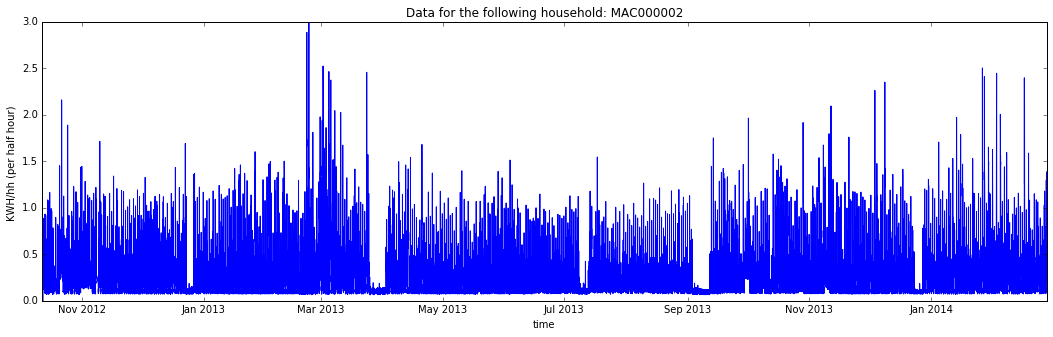

In [10]:
plot_timeseries(df_02)

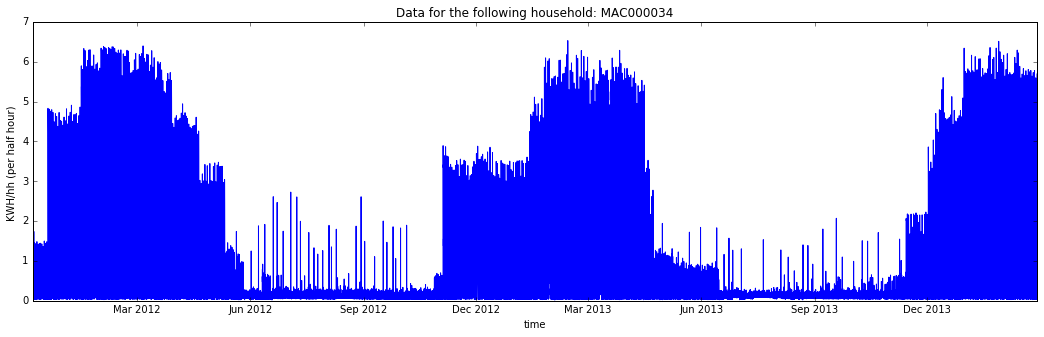

In [11]:
plot_timeseries(df_34)

In [12]:
df_35 = chose_household(df_v2_1, 'DateTime', 'KWH/hh (per half hour) ', 'LCLid', 'MAC000035')

/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


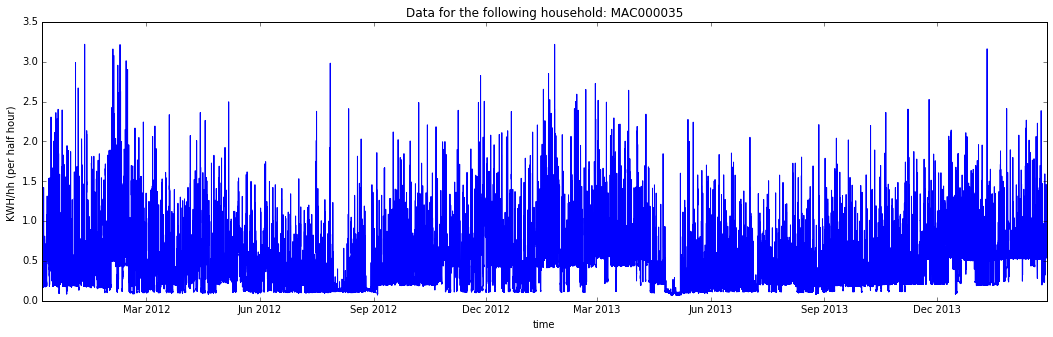

In [13]:
plot_timeseries(df_35)

/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


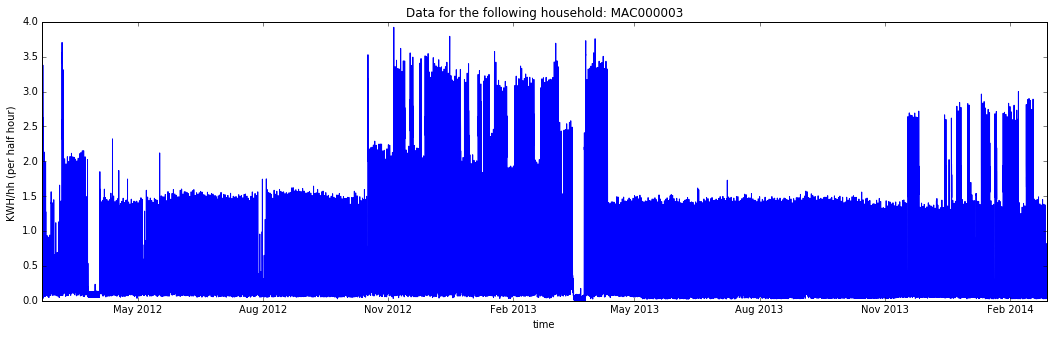

In [14]:
plot_timeseries(chose_household(df_v2_1, 'DateTime', 'KWH/hh (per half hour) ', 'LCLid', 'MAC000003'))

/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


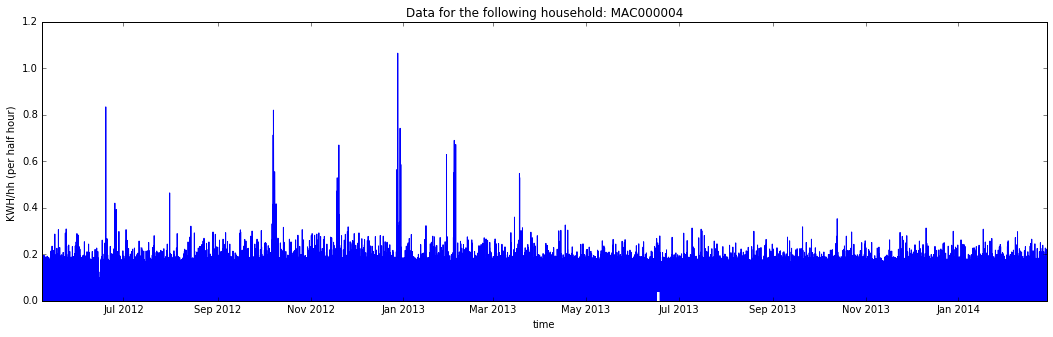

In [15]:
plot_timeseries(chose_household(df_v2_1, 'DateTime', 'KWH/hh (per half hour) ', 'LCLid', 'MAC000004'))

/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/anatoly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


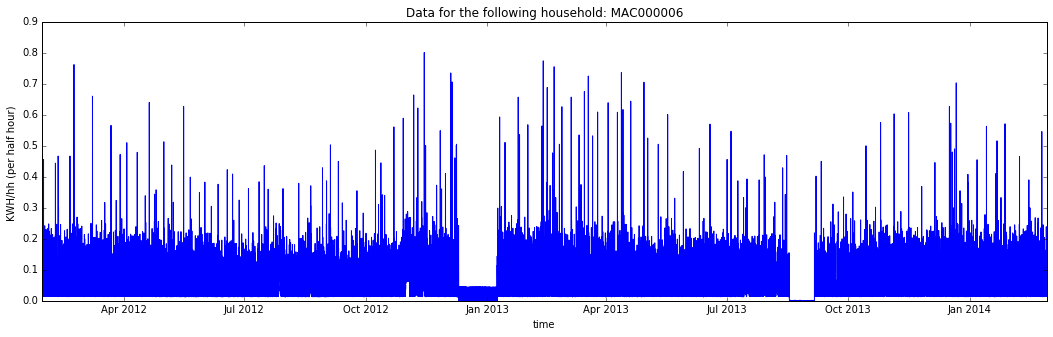

In [16]:
plot_timeseries(chose_household(df_v2_1, 'DateTime', 'KWH/hh (per half hour) ', 'LCLid', 'MAC000006'))

In [17]:
df_35.head()

,KWH/hh (per half hour)
2011-12-07 13:00:00,0.438
2011-12-07 13:30:00,1.646
2011-12-07 14:00:00,1.494
2011-12-07 14:30:00,1.154
2011-12-07 15:00:00,0.585


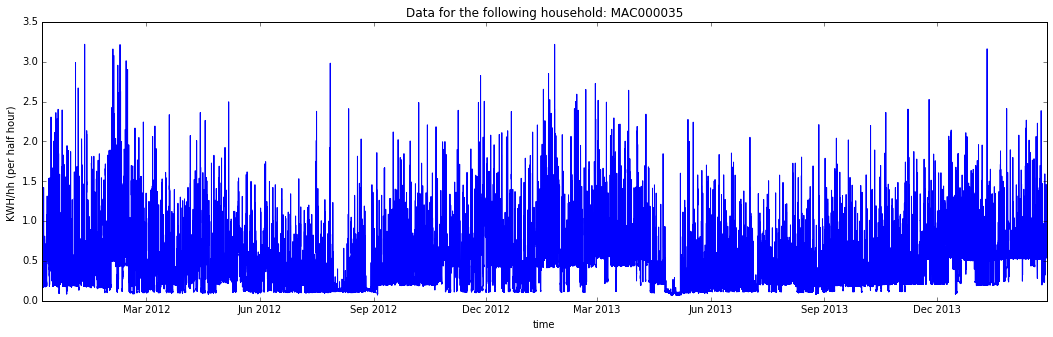

In [18]:
plot_timeseries(df_35)

In [19]:
df_35_daily = df_35.resample('D').sum()
df_35_daily.name = df_35.name+' daily'

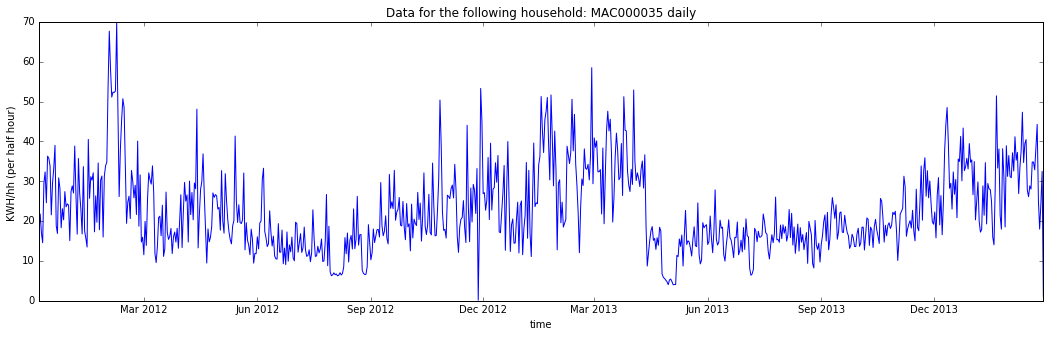

In [20]:
plot_timeseries(df_35_daily)

In [21]:
df_35_monthly = df_35.resample('M').sum()
df_35_monthly.name = df_35.name+' monthly'

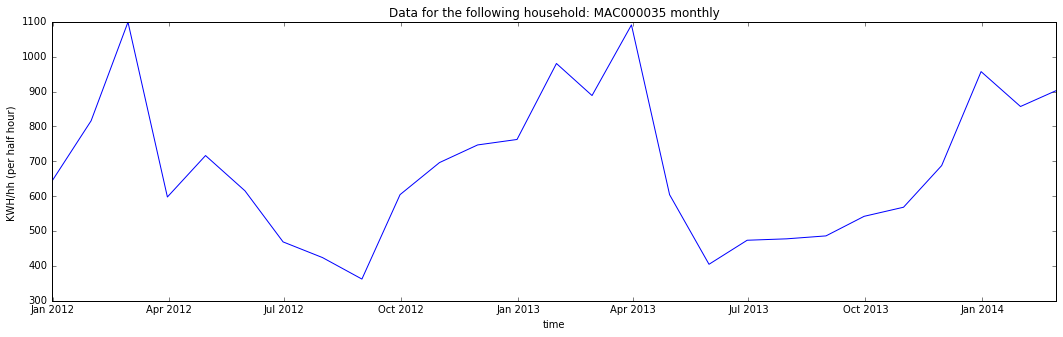

In [22]:
plot_timeseries(df_35_monthly)

In [23]:
def plot_timeseries_from_to(df, date_from, date_to):
    # INPUT: DataFrame and strings: date_from, date_to
    # dates should be in the format: 'yyyy-mm-dd' for example '2011-12-07'
    name = df.name
    date_from = pd.to_datetime(date_from).date()
    date_to = pd.to_datetime(date_to).date()
    df = df.query('index >= @date_from and index <= @date_to')
    x = df.index
    y = df[df.columns[0]].values
    #
    plt.figure(figsize=(18,5))
    plt.plot(x, y)
    plt.xlabel('time')
    plt.ylabel(df.columns[0])
    plt.title('Data for the following household: {}'.format(name))

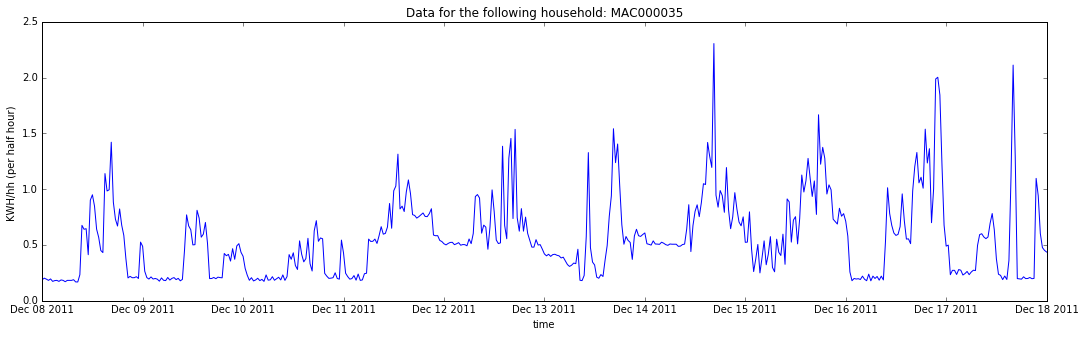

In [24]:
plot_timeseries_from_to(df_35, '2011-12-08', '2011-12-18')

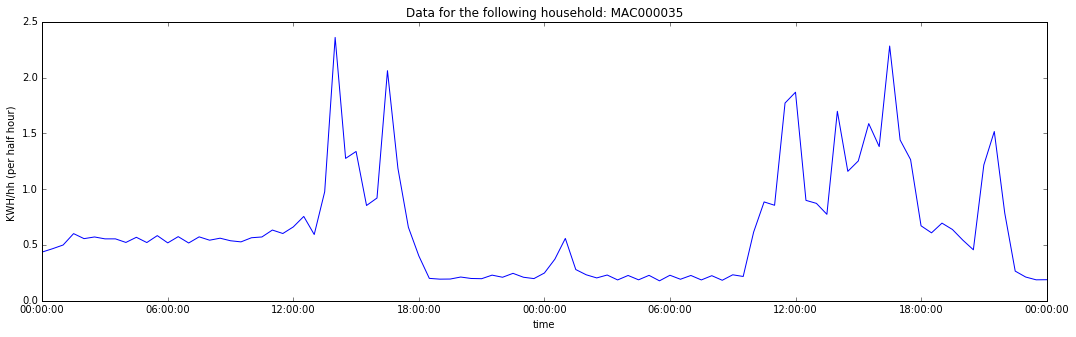

In [25]:
plot_timeseries_from_to(df_35, '2011-12-18', '2011-12-20')

In [26]:
def plot_acf_pacf(your_data, lags):
   fig = plt.figure(figsize=(12,8))
   ax1 = fig.add_subplot(211)
   fig = plot_acf(your_data, lags=lags, ax=ax1)
   ax2 = fig.add_subplot(212)
   fig = plot_pacf(your_data, lags=lags, ax=ax2)
   plt.show()

In [27]:
date_from = pd.to_datetime('2011-12-08').date()
date_to = pd.to_datetime('2011-12-09').date()

In [28]:
df_35_subset = df_35.query('index >= @date_from and index <= @date_to')

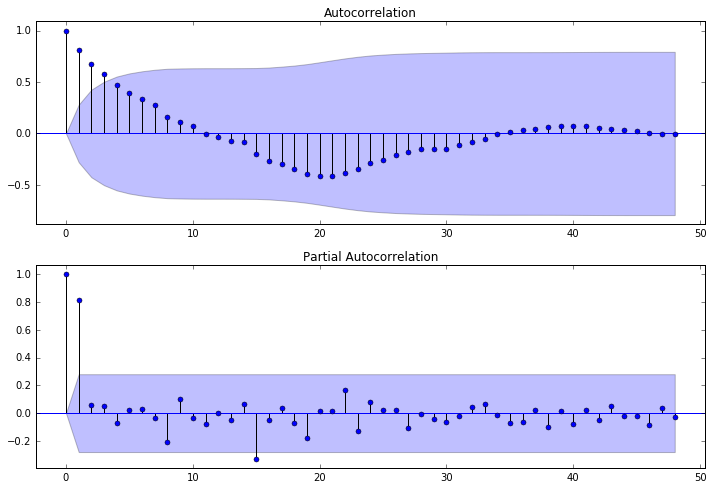

In [29]:
plot_acf_pacf(df_35_subset, 48)

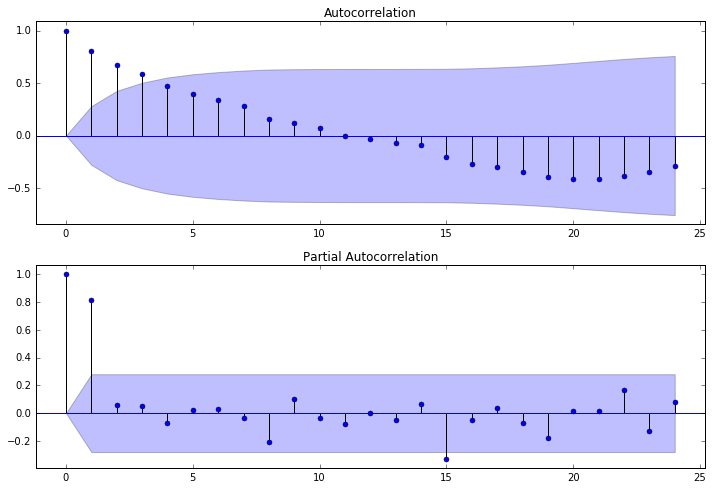

In [30]:
plot_acf_pacf(df_35_subset, 24)

In [31]:
date_from = pd.to_datetime('2011-12-08').date()
date_to = pd.to_datetime('2011-12-18').date()
df_35_10days = df_35.query('index >= @date_from and index <= @date_to')

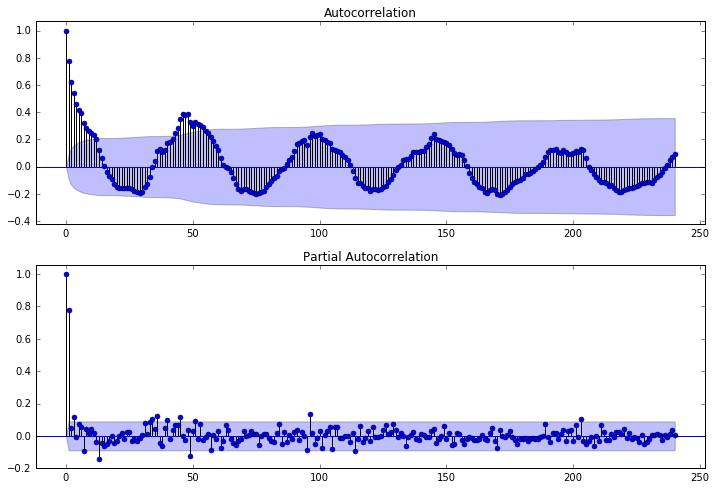

In [32]:
plot_acf_pacf(df_35_10days, 240)

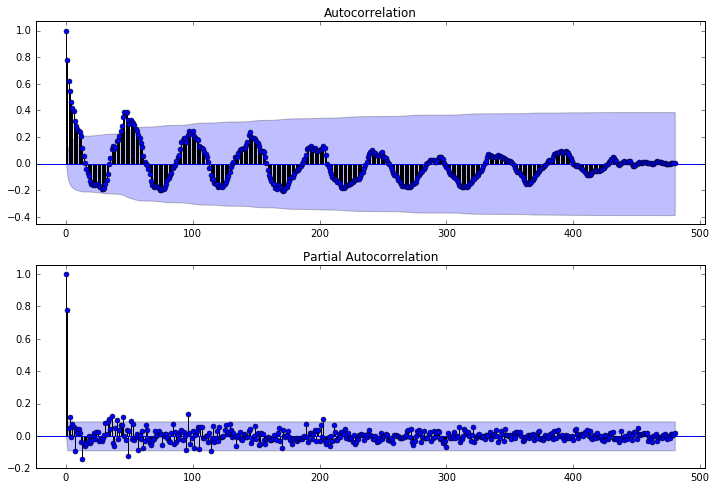

In [33]:
plot_acf_pacf(df_35_10days, 480)

# Let us try some modeling

In [34]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])

In [35]:
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)

In [36]:
dates = sm.tsa.datetools.dates_from_range('1980m1', length=nobs)
y = pd.Series(y, index=dates)

In [37]:
# training model
arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)

In [38]:
print arma_res.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  250
Model:                     ARMA(2, 2)   Log Likelihood                -237.115
Method:                       css-mle   S.D. of innovations              0.622
Date:                Wed, 05 Oct 2016   AIC                            484.229
Time:                        20:52:59   BIC                            501.837
Sample:                    01-31-1980   HQIC                           491.316
                         - 10-31-2000                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ar.L1.y        1.0169      0.177      5.759      0.000         0.671     1.363
ar.L2.y       -0.4720      0.097     -4.870      0.000        -0.662    -0.282
ma.L1.y        0.2660      0.188      1.411      0.1

/Users/anatoly/anaconda/lib/python2.7/site-packages/statsmodels/tsa/arima_model.py:1724: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


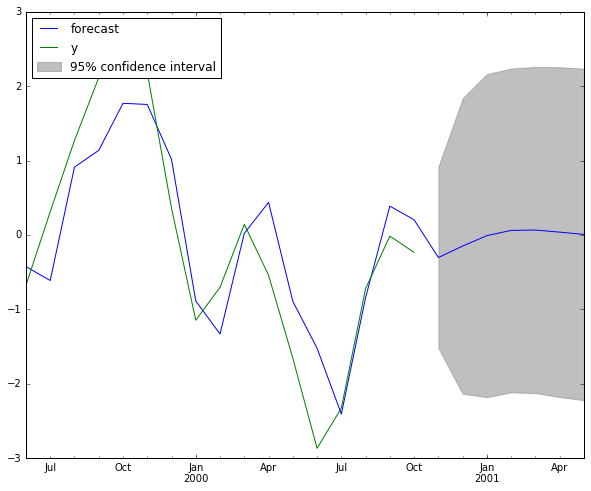

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
fig = arma_res.plot_predict(start='1999m6', end='2001m5', ax=ax)
legend = ax.legend(loc='upper left')

# The above was exaple run with generated data. Now, let's try to run on our data

In [82]:
# training model
arma_mod_df_35_10 = sm.tsa.ARMA(df_35_10days, order=(20,1), freq='30Min')
arma_res_df_35_10 = arma_mod_df_35_10.fit(trend='c',disp=-1)

In [83]:
print arma_res_df_35_10.summary()

                                 ARMA Model Results                                
Dep. Variable:     KWH/hh (per half hour)    No. Observations:                  481
Model:                         ARMA(20, 1)   Log Likelihood                  60.743
Method:                            css-mle   S.D. of innovations              0.213
Date:                     Wed, 05 Oct 2016   AIC                            -75.485
Time:                             21:07:41   BIC                             20.560
Sample:                         12-08-2011   HQIC                           -37.735
                              - 12-18-2011                                         
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
const                              0.5578      0.039     14.149      0.000         0.480     0.635
ar.L1.KWH/hh (per half hour)   

In [44]:
def plot_pred_timeseries(df_data, series_pred, date_from, date_to):
    # INPUT: DataFrame, Series
    # dates should be in the format: 'yyyy-mm-dd' for example '2011-12-07'
    name = df_data.name
    date_from = pd.to_datetime(date_from).date()
    date_to = pd.to_datetime(date_to).date()
    df_data = df_data.query('index >= @date_from and index <= @date_to')
    #
    plt.figure(figsize=(18,5))
    # plotting data
    x = df_data.index
    y = df_data[df_data.columns[0]].values
    plt.plot(x, y, color='b')
    #
    #plotting prediction
    xpred = series_pred.index
    ypred = series_pred.values
    plt.plot(xpred, ypred, color='g')
    #
    plt.xlabel('time')
    plt.ylabel(df_data.columns[0])
    plt.title('Data for the following household: {}'.format(name))

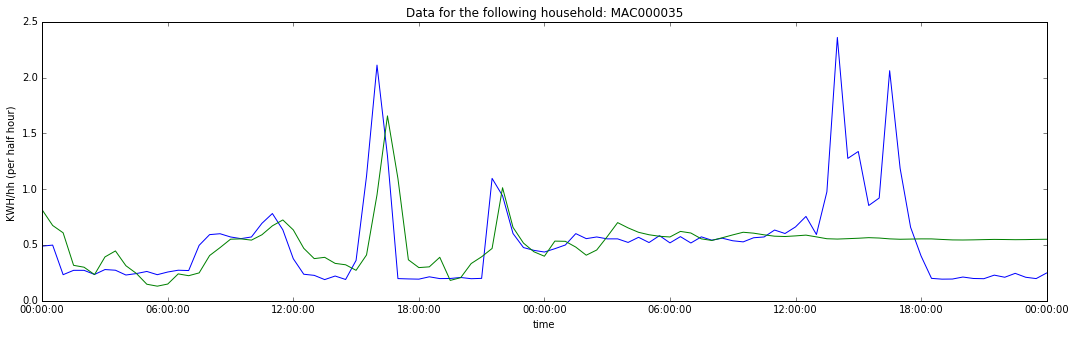

In [84]:
pred_df_35_10 = arma_res_df_35_10.predict(start='2011-12-17', end='2011-12-19')
plot_pred_timeseries(df_35, pred_df_35_10, '2011-12-17', '2011-12-19')

In [85]:
date_from = pd.to_datetime('2011-12-08').date()
date_to = pd.to_datetime('2011-12-09').date()
df_35_1day = df_35.query('index >= @date_from and index <= @date_to')

In [105]:
# training model
arma_mod_df_35_1 = sm.tsa.ARMA(df_35_1day, order=(9,6), freq='30Min')
arma_res_df_35_1 = arma_mod_df_35_1.fit(trend='nc',disp=-1)

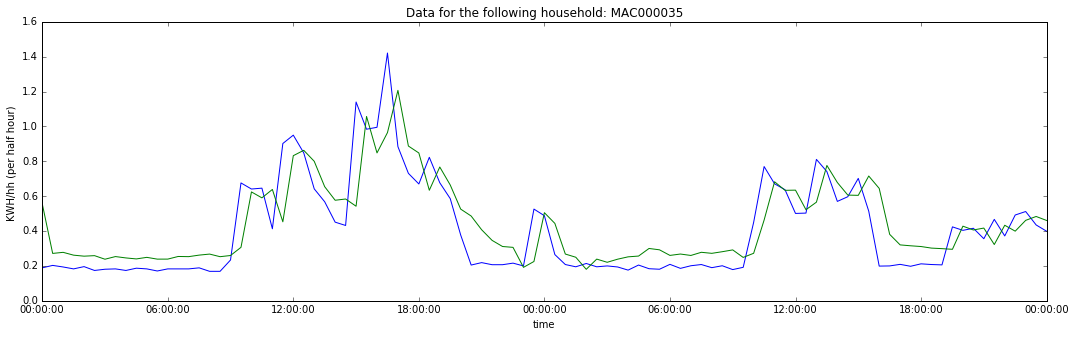

In [108]:
pred_df_35_1 = arma_res_df_35_1.predict(start='2011-12-08', end='2011-12-11')
plot_pred_timeseries(df_35, pred_df_35_1, '2011-12-08', '2011-12-11')